# Overview of the Dataset
Temple University Seizure (TUSZ):
This corpus is a collection of EEG data from epileptic patients, collected by researchers at Temple University Hospital in Philadelphia, USA. The corpus includes data from more than 600 individuals, including both adults and children, with a variety of different types of seizures, including focal seizures, generalized seizures, and status epilepticus.
The corpus includes a wide range of data, including raw EEG recordings, annotations of seizure onset and offset, and clinical information such as age, sex, and seizure type. The data is collected from several EEG modalities, including scalp EEG, intracranial EEG, and magnetoencephalography, which allows for a wide range of research possibilities.
The corpus is publicly available for research and commercial purposes and can be downloaded from the website of the Temple University Epilepsy Centre [1]. It is widely used in the research community as a benchmark dataset


[1] I. Obeid and J. Picone, "The Temple University Hospital EEG," Frontiers in Neuroscience, Section Neural Technology, vol. 10, p. 196, 2016.


# Background
Epilepsy is a chronic, non-communicable neurological disorder that affects people of all ages and impacts their quality of life. It is the fourth most widespread brain disease, affecting approximately 50 million people. Active epilepsy is defined as continuing Seizures which disturbs patients’ life or the ones that need medical attention, is thought to affect between 4 and 10 per 1000 people. Nearly 80% of patients diagnosed with epilepsy reside in low- and middle-income nations [1]. In Finland epilepsy has affected up to 60,000 persons, which among them are about 5,000 children [2]. If diagnosed and treated in a time, more than half of epileptic patients could live seizure-free lives and the risk of dying prematurely could be drastically reduced.
Seizure detection (SD) devices come in various forms including motion sensors (such as accelerometers, gyroscopes, magnetometers, piezoelectric bed sensors, surface Electromyogram (EMG), eye tracking, and video monitors), physiological change detectors (heart rate, pulse, electrodermal response, temperature, respiration, oxygen saturation, blood pressure), and Electroencephalography (EEG) based devices (surface and implantable intracranial systems), as well as other methods (audio and near-infrared spectroscopy) [3]. EEG is a non-invasive method for measuring the brain's electrical activity. The detection of seizures, which are sudden and abnormal bursts of cerebral electrical activity, is one of the most significant uses of EEG. Multiple neurological conditions, such as epilepsy, brain tumors, and head trauma, can induce seizures.
Seizures and status epilepticus (SE) can also be a serious medical condition in the Intensive Care Unit (ICU) that requires prompt evaluation and treatment since they are frequently linked to extended stays in the hospital and the intensive care unit (ICU) [4]. Although they are not necessarily the initial damage, but they might arise later because of persistent intracranial pathophysiologic alterations, central nervous system (CNS) insults, metabolic disturbances, brain injury, infections, and drug reactions in critically ill individuals. Due to frequent seizures, many people suffer from secondary injuries such as hypoperfusion, hypoxia, and excitotoxic damage to the brain [5].
Nonconvulsive seizures (NCS) are a type of seizure that do not involve visible convulsions or involuntary movements, making them difficult to detect without the use of EEG monitoring. Studies show that NCS can occur in 8% to 34% of the critically ill patients in the ICU, and they can be associated with a range of adverse outcomes, including increased mortality, longer hospital stays, and worse neurological outcomes, which underlines the importance of their early detection [6]. This is a challenging task as sedated patients may not show the classic signs of seizures, such as convulsions or jerking movements. For this reason, continuous EEG monitoring is often recommended in critically ill patients who are at high risk for seizures, particularly those with underlying neurological conditions or who have suffered brain injuries. Continuous EEG monitoring can provide real-time information about changes in brain activity, allowing healthcare providers to detect and respond to NCS quickly.
Seizure detection using EEG entails analysing brain activity patterns indicative of seizures, which can include changes in amplitude, frequency, and phase of the EEG signals. Although the gold standard for the diagnosis and management of neurological disorders such as seizure is the manual EEG signal interpretation, it presents several challenges, including the variability in seizures' appearance and duration, the obscuring of seizures by background EEG activity, and the difficulty in classifying and subtyping seizures. Moreover, manual EEG seizure detection demands considerable expertise, and the process is prone to errors due to fatigue or inattention. Also in ICU environment, monitoring the EEG signal for all the sedated patients among all the devices continuously might not be feasible for the limited number of staff. As a result, there has been a surge of interest in developing accurate and efficient automatic EEG-based seizure detection algorithms.


[1] "Epilepsy," World Health Organization, 09 February 2022. [Online]. Available: https://www.who.int/news-room/fact-sheets/detail/epilepsy. [Accessed 10 January 2023].
[2] "About epilepsy," Finnish Epilepsy Association, 02 December 2022. [Online]. Available: https://www.epilepsia.fi/en/about-epilepsy/. [Accessed 10 January 2023].
[3] J. Shum and D. Friedman, "Commercially available seizure detection devices: A systematic review," Journal of the Neurological Sciences, vol. 428, no. 117611.
[4] L.-M. Kortland, S. Knake, F. Rosenow and A. Strzelczyk, "Cost of status epilepticus: A systematic review," Seizure, vol. 24, pp. 17-20, 2015.
[5] K. Sang-Bae, "Multimodality Monitoring in the Neurointensive Care Unit: A Special Perspective for Patients with Stroke," J. Stroke., vol. 15, p. 99–108, 2013.
[6] M. Strein, J. Holton-Burke, L. Smith and G. Brophy, "Prevention, Treatment, and Monitoring of Seizures in the Intensive Care Unit," Journal of clinical medicine, vol. 8, 2019.

# Environment setup

In [1]:
#!pip install matplotlib pandas numpy scipy seaborn mne

In [2]:
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.patches as patches
from General_utility import read_edf_file

### Plotting a sample EEG signal without any seizure

Extracting EDF parameters from E:\EEG\seizure TUH v2\aaaaaaac\s005_2002_12_27\02_tcp_le\aaaaaaac_s005_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76499  =      0.000 ...   305.996 secs...


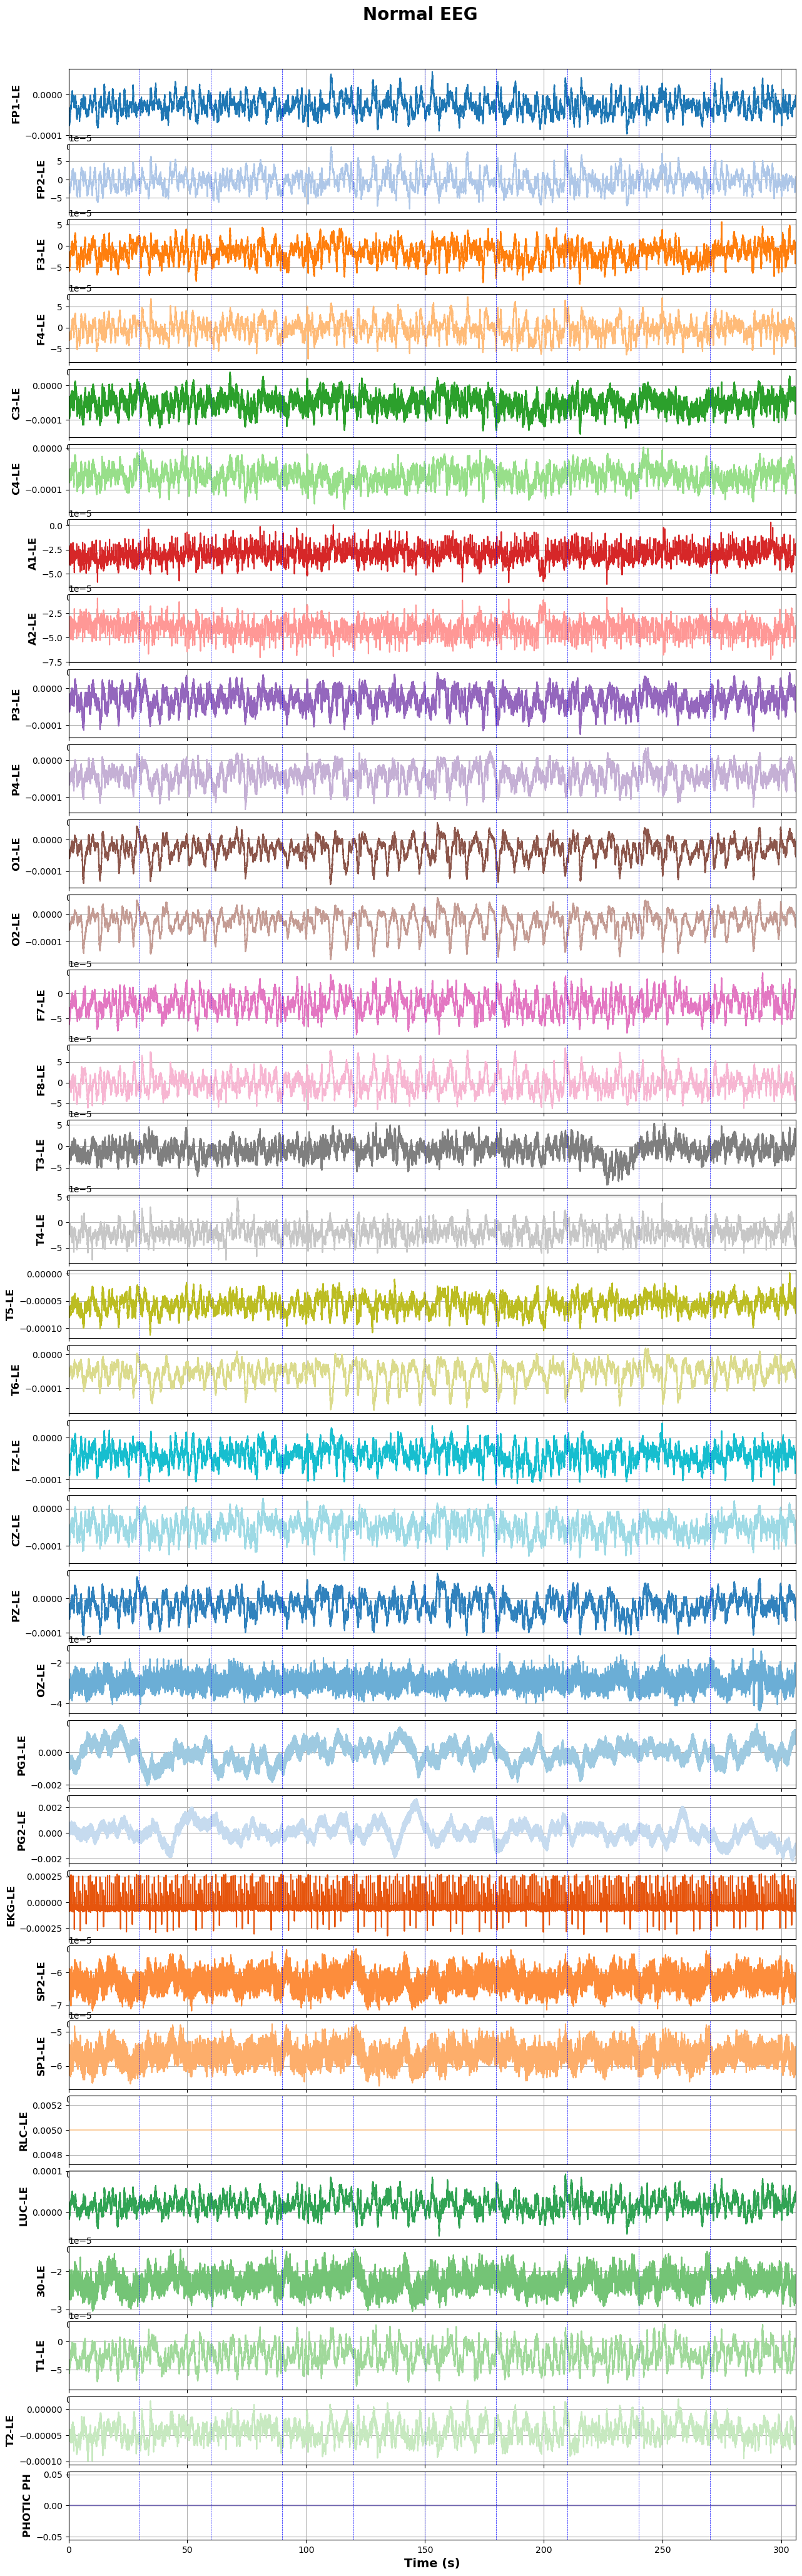

In [3]:
file_path = 'E:/EEG/seizure TUH v2/aaaaaaac/s005_2002_12_27/02_tcp_le/aaaaaaac_s005_t002.edf'
annotations_path_bi = 'E:/EEG/seizure TUH v2/aaaaaaac/s005_2002_12_27/02_tcp_le/aaaaaaac_s005_t002.csv_bi'
epoch_length = 30
n_epochs, EEG_data, labels, channel_names, fs = read_edf_file(file_path, annotations_path_bi, epoch_length)
n_channels = len(channel_names) 
time = np.arange(0, EEG_data.shape[1]) / fs 
colors = plt.cm.tab20.colors + plt.cm.tab20c.colors[:n_channels]

fig, ax = plt.subplots(nrows=n_channels, ncols=1, figsize=(15,50))
for i in range(n_channels):
    ax[i].plot(time, EEG_data[i], color=colors[i])  # Set each channel to a different color
    ax[i].set_ylabel(channel_names[i], fontsize=12, fontweight='bold')  # Set cool font for labels
    ax[i].set_xlim([0, len(EEG_data[0]) / fs])
    ax[i].grid(True)

    # Adding vertical lines at each epoch boundary
    for j in range(n_epochs):
        ax[i].axvline(j * epoch_length, color='blue', linestyle='--', linewidth=0.5)
       # Highlight epochs with seizures based on the label
        if labels[j] == 1:
            rect = patches.Rectangle(
                (j * epoch_length, ax[i].get_ylim()[0]),  # Bottom-left corner
                epoch_length,  # Width
                ax[i].get_ylim()[1] - ax[i].get_ylim()[0],  # Height
                linewidth=0,
                edgecolor='red',
                facecolor='red',
                alpha=0.3
            )
            ax[i].add_patch(rect)

plt.xlabel('Time (s)', fontsize=14, fontweight='bold')
plt.suptitle('Normal EEG', fontsize=20, fontweight='bold', y=0.92);
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=0.9,
    wspace=0.9,
    hspace=0.1,)

### Plotting an EEG signal containing seizure occurances 

Extracting EDF parameters from E:\EEG\seizure TUH v2\aaaaaaac\s001_2002_12_23\02_tcp_le\aaaaaaac_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75249  =      0.000 ...   300.996 secs...


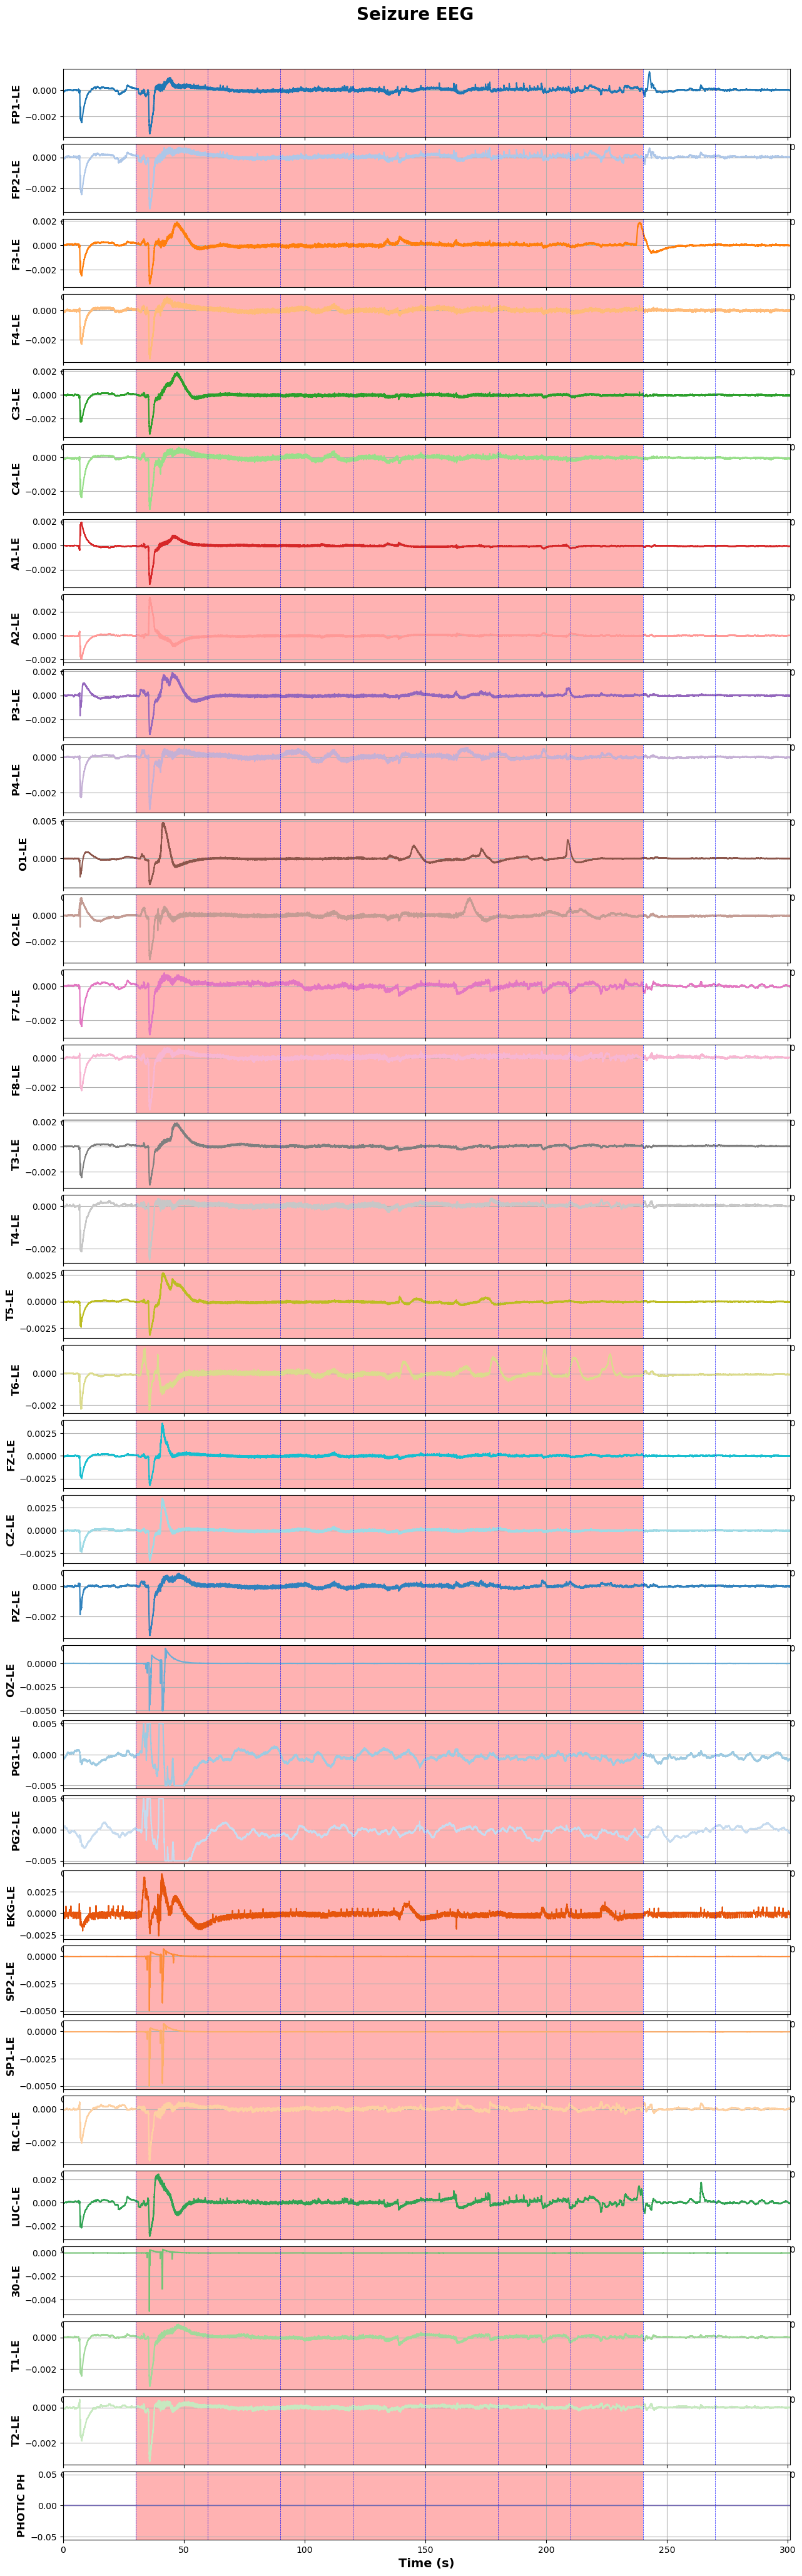

In [4]:
file_path = 'E:/EEG/seizure TUH v2/aaaaaaac/s001_2002_12_23/02_tcp_le/aaaaaaac_s001_t000.edf'
annotations_path_bi = 'E:/EEG/seizure TUH v2/aaaaaaac/s001_2002_12_23/02_tcp_le/aaaaaaac_s001_t000.csv_bi'
epoch_length = 30
n_epochs, EEG_data, labels, channel_names, fs = read_edf_file(file_path, annotations_path_bi, epoch_length)
n_channels = len(channel_names) 
time = np.arange(0, EEG_data.shape[1]) / fs 
colors = plt.cm.tab20.colors + plt.cm.tab20c.colors[:n_channels]

fig, ax = plt.subplots(nrows=n_channels, ncols=1, figsize=(15,50))
for i in range(n_channels):
    ax[i].plot(time, EEG_data[i], color=colors[i])  # Set each channel to a different color
    ax[i].set_ylabel(channel_names[i], fontsize=12, fontweight='bold')  # Set cool font for labels
    ax[i].set_xlim([0, len(EEG_data[0]) / fs])
    ax[i].grid(True)

    # Adding vertical lines at each epoch boundary
    for j in range(n_epochs):
        ax[i].axvline(j * epoch_length, color='blue', linestyle='--', linewidth=0.5)
       # Highlight epochs with seizures based on the label
        if labels[j] == 1:
            rect = patches.Rectangle(
                (j * epoch_length, ax[i].get_ylim()[0]),  # Bottom-left corner
                epoch_length,  # Width
                ax[i].get_ylim()[1] - ax[i].get_ylim()[0],  # Height
                linewidth=0,
                edgecolor='red',
                facecolor='red',
                alpha=0.3
            )
            ax[i].add_patch(rect)

plt.xlabel('Time (s)', fontsize=14, fontweight='bold')
plt.suptitle('Seizure EEG', fontsize=20, fontweight='bold', y=0.92);
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=0.9,
    wspace=0.9,
    hspace=0.1,)